# HW 3: Data exploration
#### COSC 410: Spring 2024, Colgate University

In this homework you will be working with the [Energy Efficiency Dataset](https://www.kaggle.com/datasets/elikplim/eergy-efficiency-dataset) dataset from Kaggle. This data has already been downloaded for you and included in the starter folder. 

## Task

Imagine you are working as a data science intern for a construction company. They ask you to come up with a proposal for how to make their buildings more energy efficient. Concretely, they care about decreasing heating and/or cooling load (i.e., the amount of heat/cool energy to maintain a desired set temperature). 

In this proposal they want you to include a list of design decisions they should consider, ranked by how likely each of the decisions is for improving energy efficiency.  Your task in this homework is to use this dataset and come up with a proposal for them. 

## Part 1: Data description and preprocessing

In this section load your data, explore it, split it and transform it in any way you think is appropriate. Justify your decisions.

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('energy_efficiency_data.csv')

# I've decided to use the formula df['Combined'] = (df['Y1'] + df['Y2']) / 2 for predicting in my model. By analyzing the dataset 
# and using this formula, I believe I can assess the correlation between these design decisions and the combined variable representing 
# energy efficiency. With statistical analysis, we can determine which design decisions have the strongest positive correlation with 
# improved energy efficiency. This will help the construction company prioritize the most effective strategies for reducing heating and 
# cooling loads in their buildings.
 
df['Combined'] = (df['Y1'] + df['Y2']) / 2
df['Combined'] = df['Combined'].round()




n = df.shape[0]
train = df.iloc[0:int(n*0.7)]
val = df.iloc[int(n*0.7):int(n*0.8)]
test = df.iloc[int(n*0.8):n]

# print(df['Combined'].shape[0])
# print(f'Train has {train.shape[0]} rows')
# print(f'Val has {val.shape[0]} rows')
# print(f'Test has {test.shape[0]} rows')


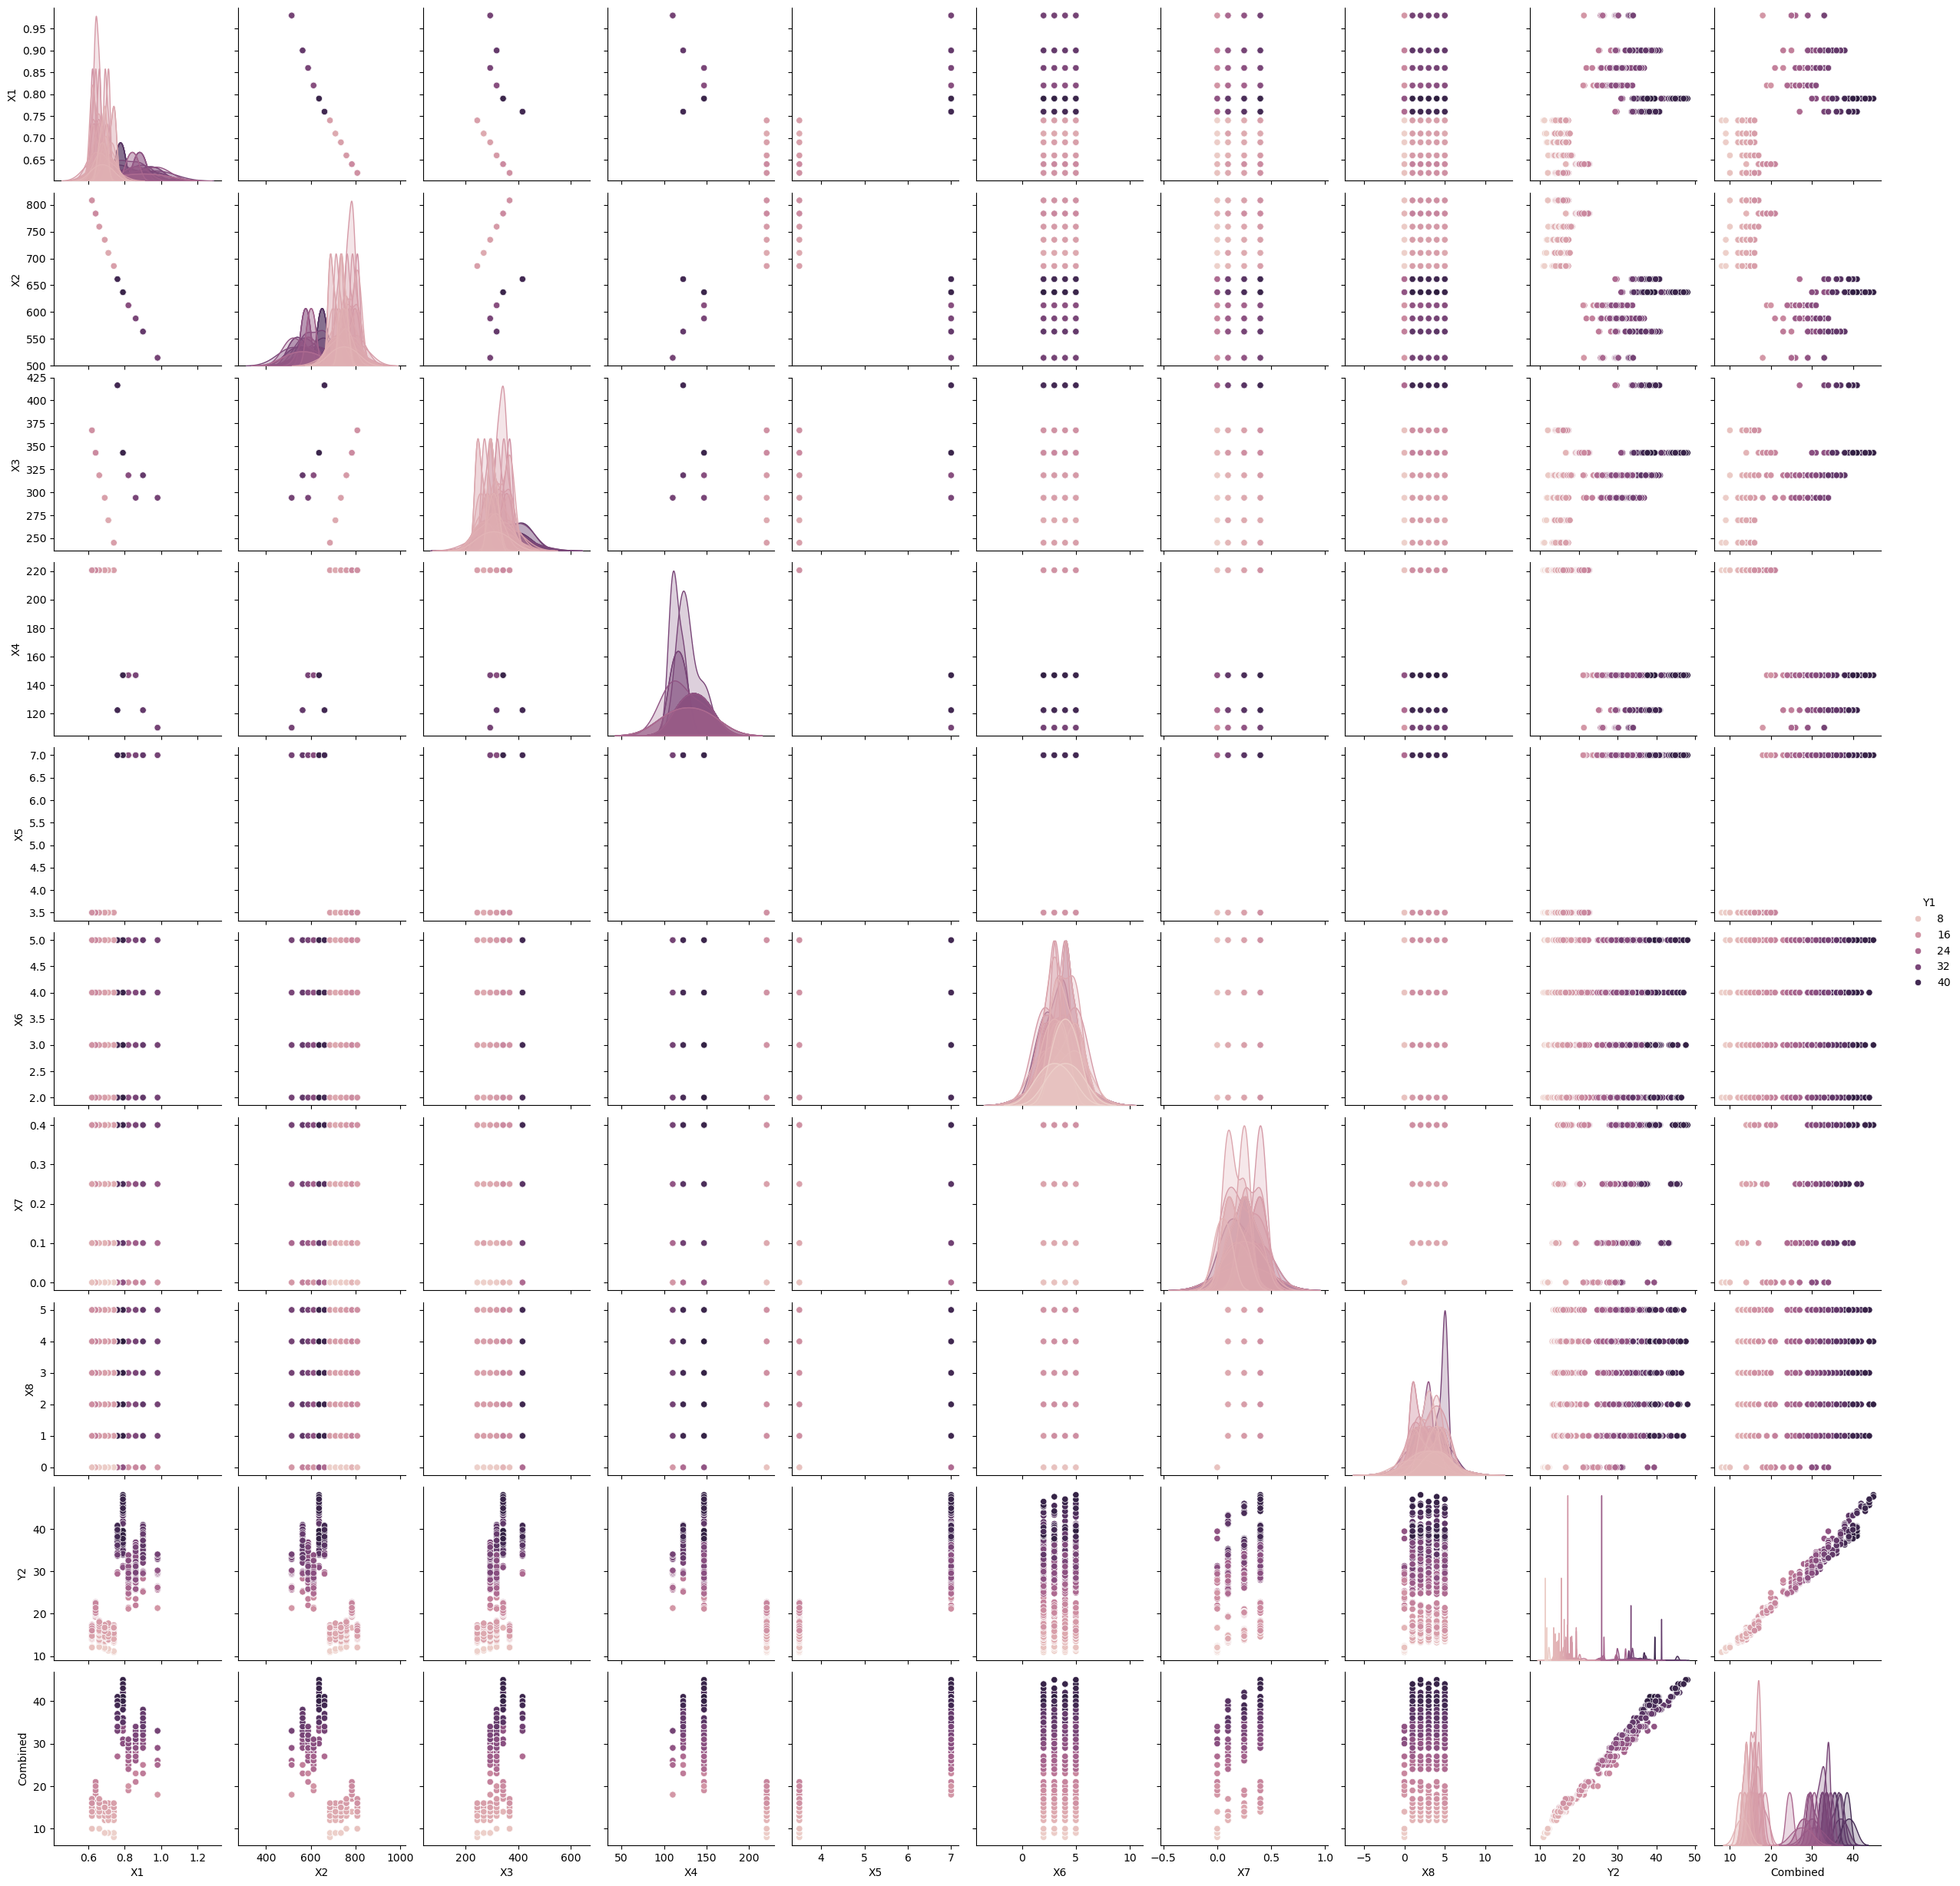

In [84]:

sns.pairplot(data = df,hue = 'Y1')
plt.show()


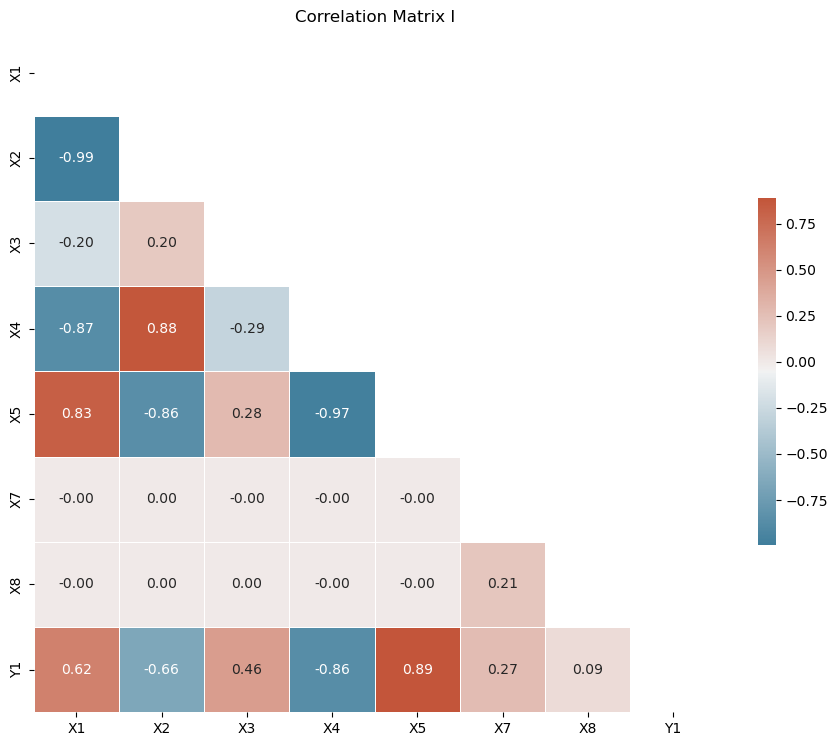

In [85]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

features_and_target = ['X1', 'X2','X3','X4', 'X5', 'X7', 'X8', 'Y1']
data_for_corr = df[features_and_target]
corr = data_for_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, fmt=".2f",
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title('Correlation Matrix I')

plt.show()




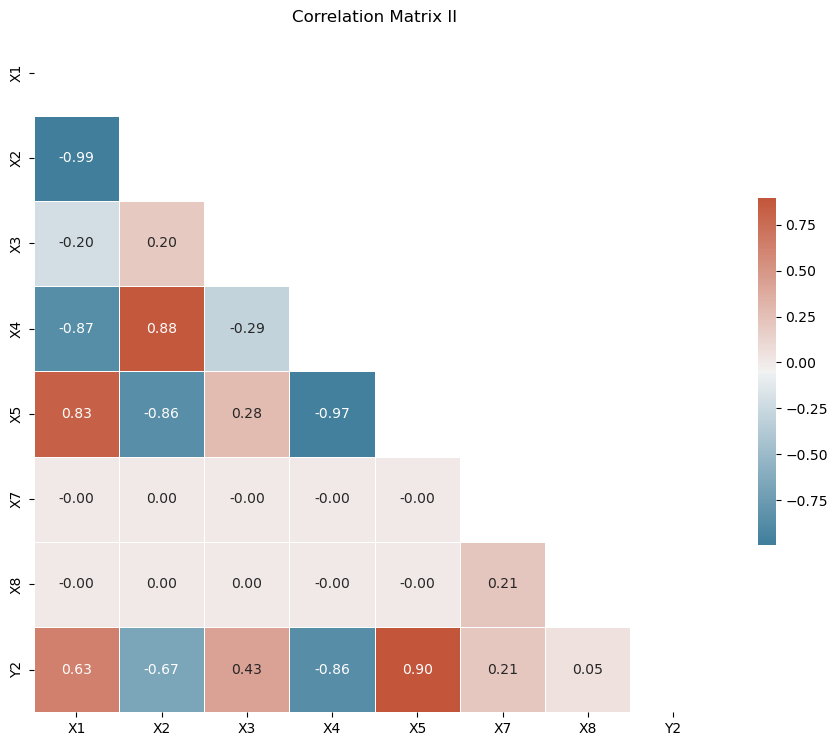

In [86]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

features_and_target = ['X1', 'X2','X3','X4', 'X5', 'X7', 'X8', 'Y2']
data_for_corr = df[features_and_target]
corr = data_for_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, fmt=".2f",
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title('Correlation Matrix II')

plt.show()




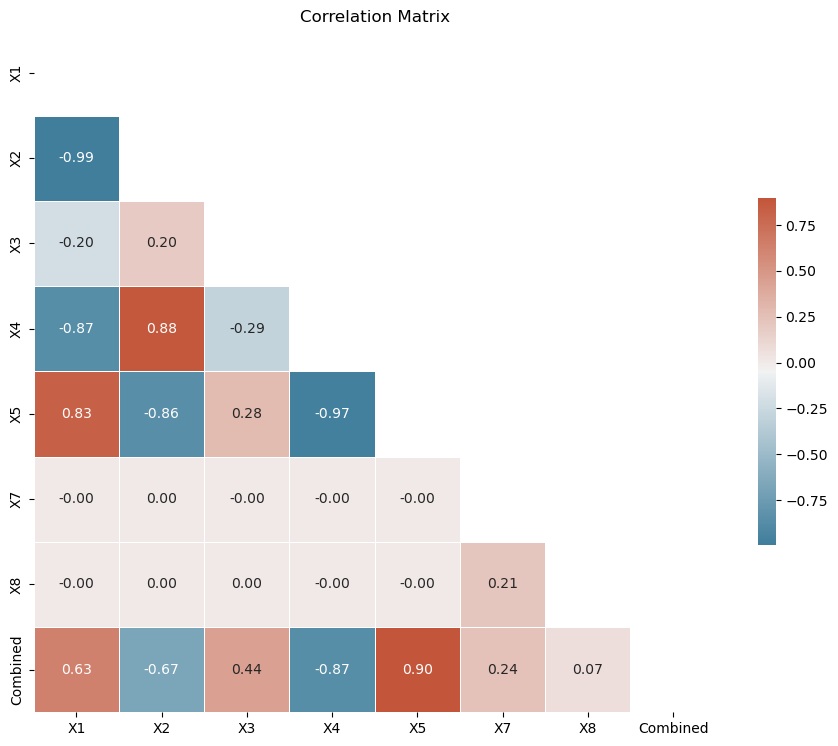

In [87]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

features_and_target = ['X1', 'X2','X3','X4', 'X5', 'X7', 'X8', 'Combined']
data_for_corr = df[features_and_target]
corr = data_for_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, fmt=".2f",
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title('Correlation Matrix')

plt.show()




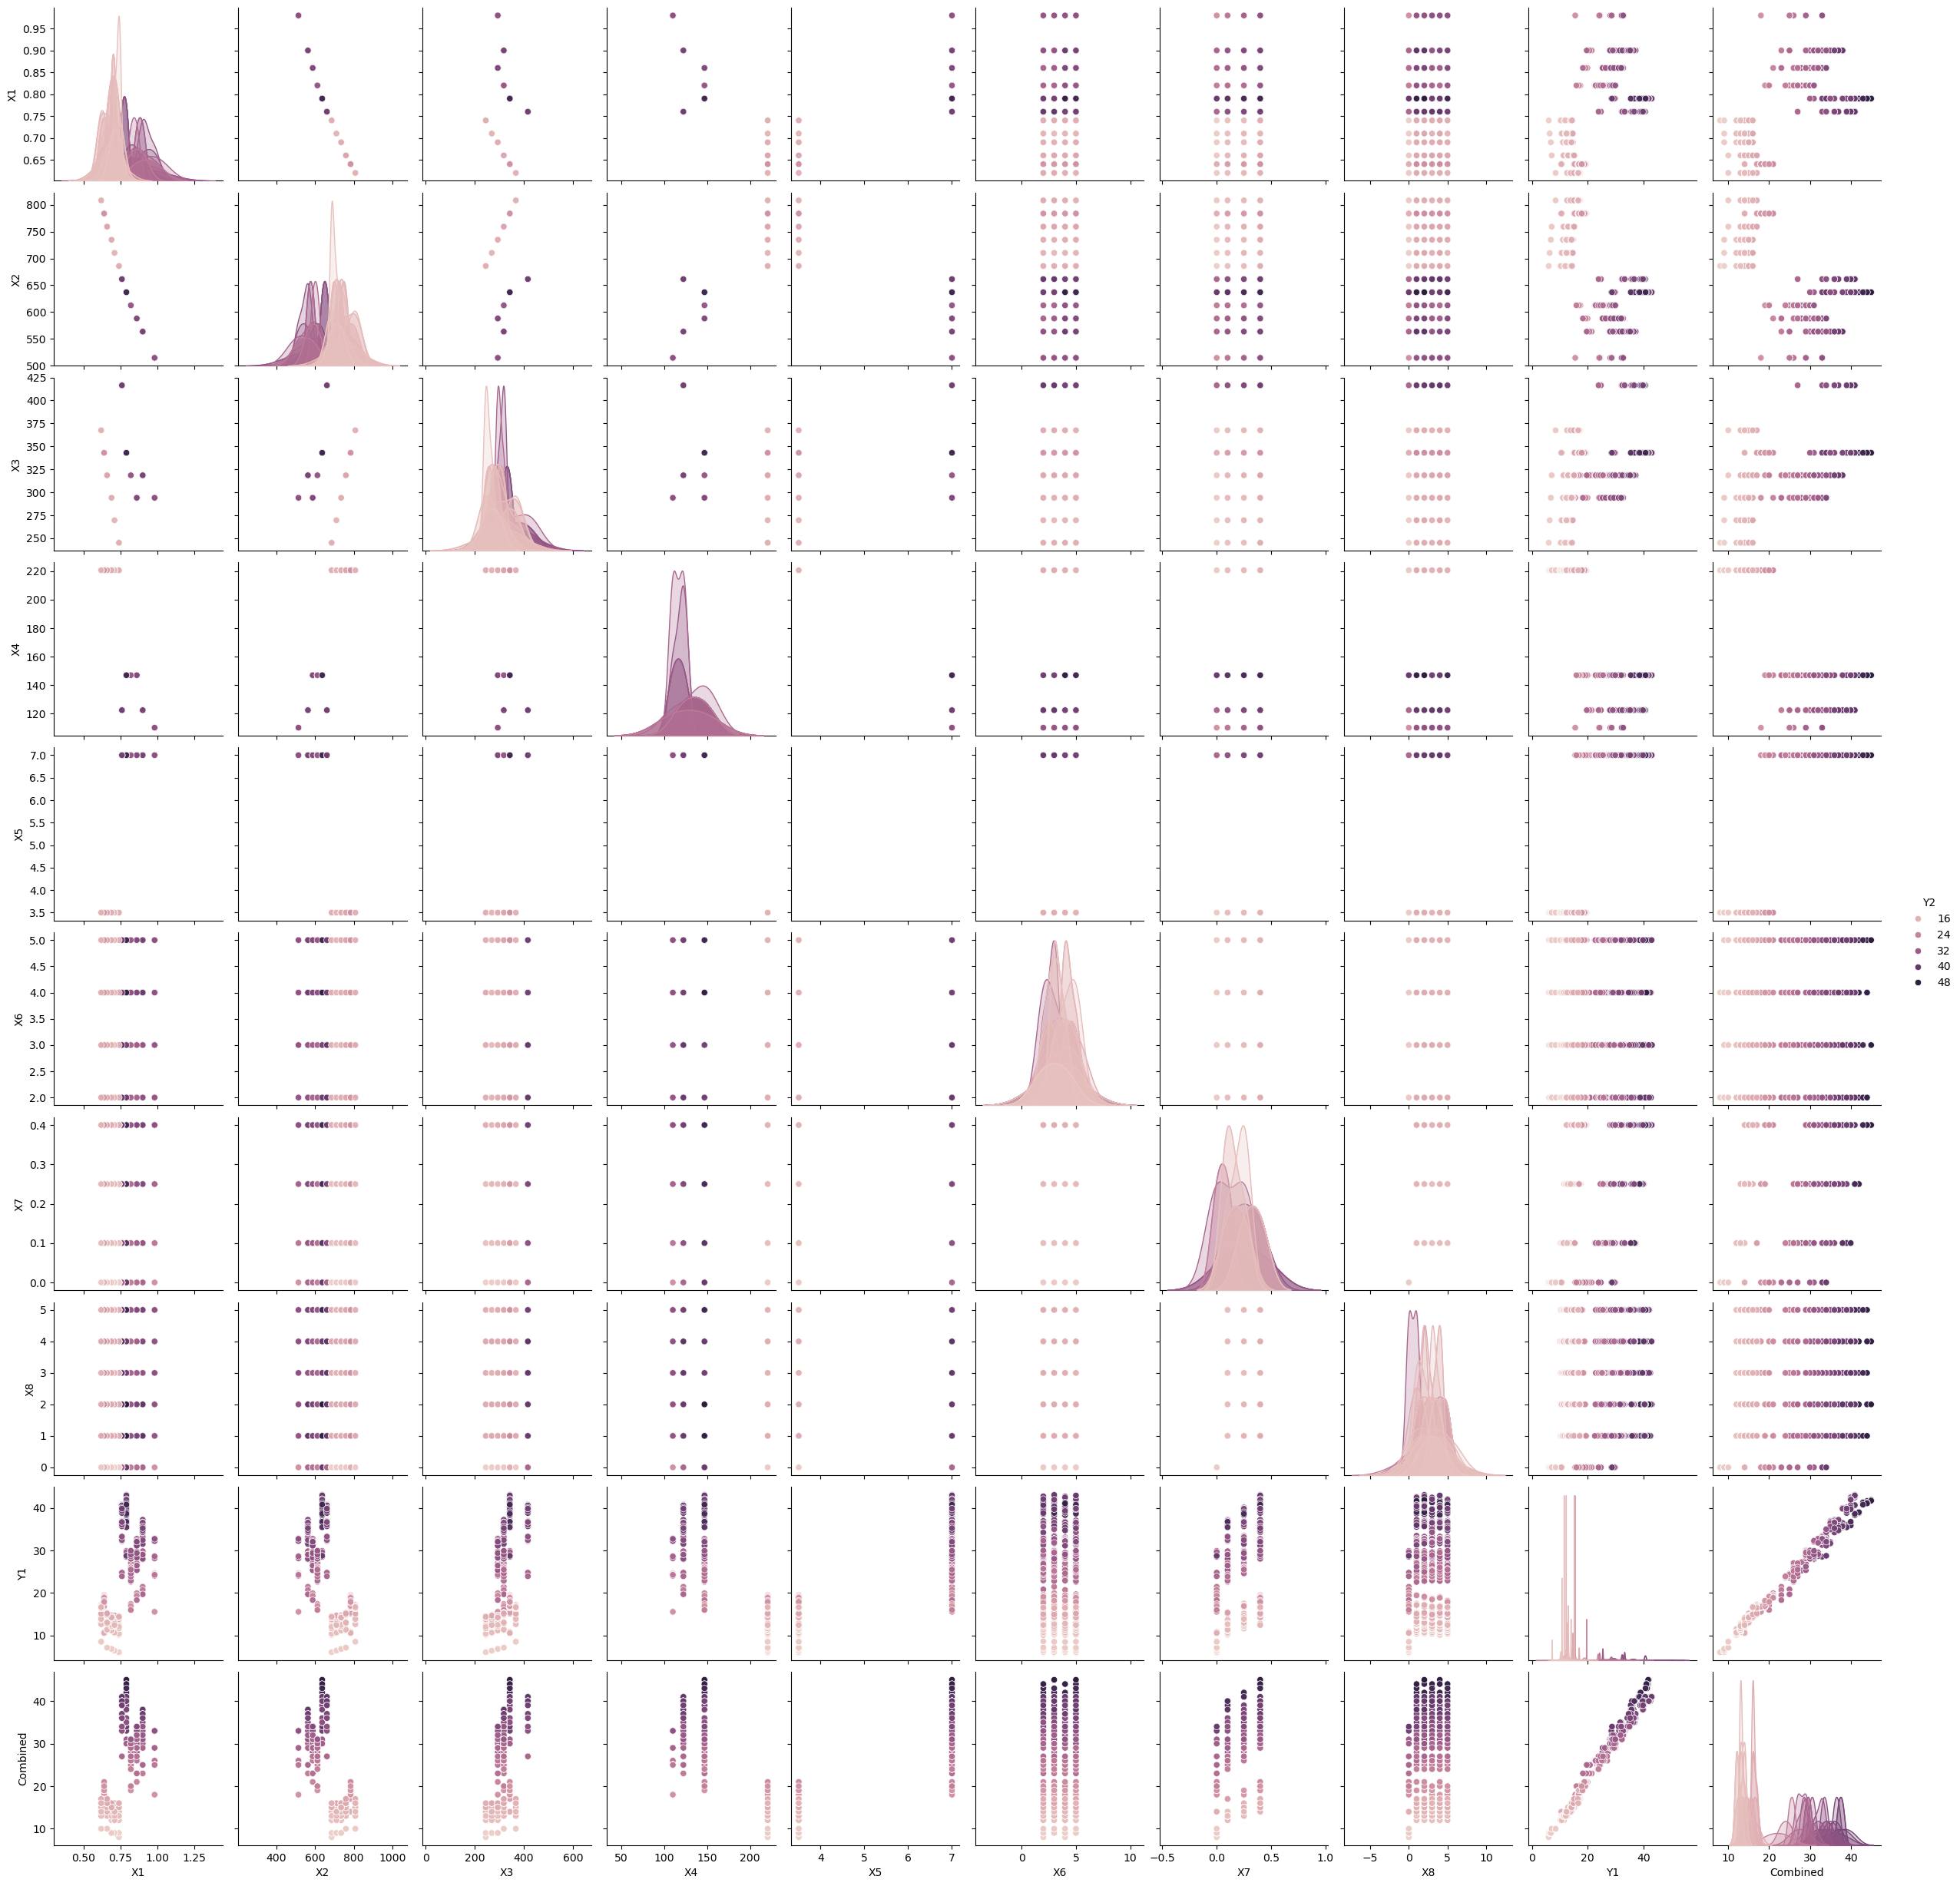

In [88]:

sns.pairplot(data = df,hue = 'Y2')
plt.show()


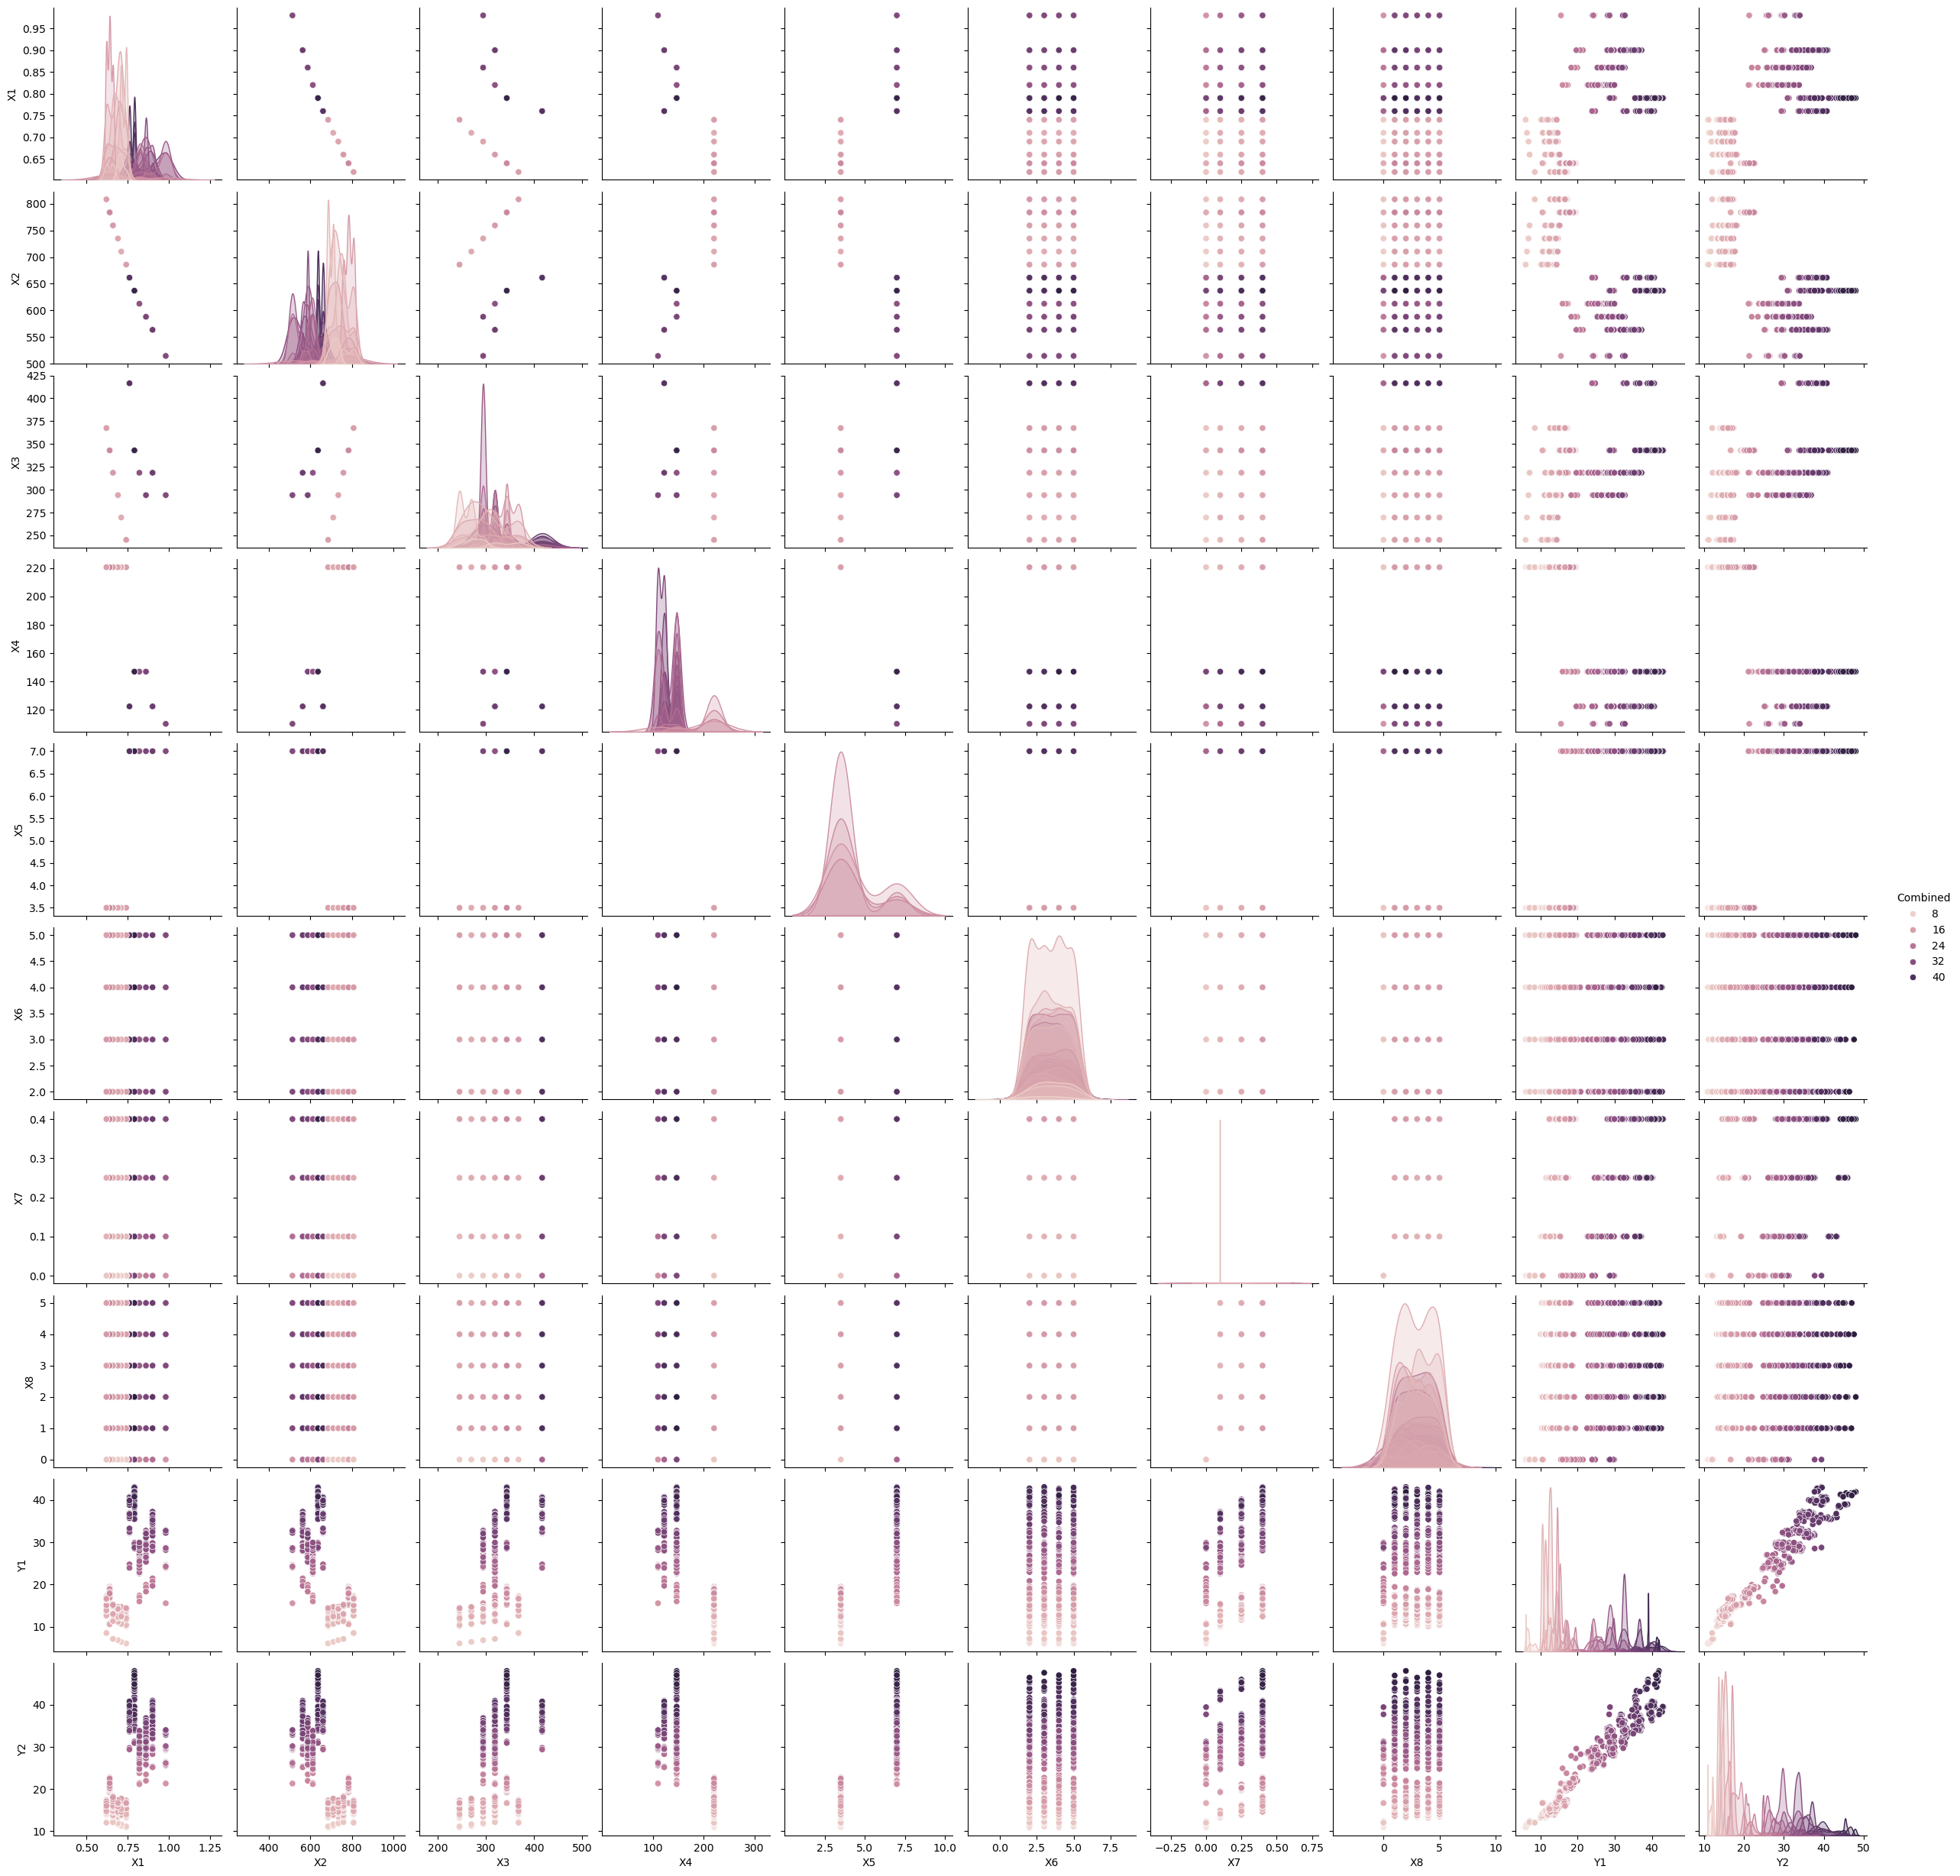

In [89]:

sns.pairplot(data = df,hue = 'Combined')
plt.show()


## Part 2: Hypothesis generation

In this section, generate a hypothesis (or few) about what design decisions might improve energy efficiency. 

## Part 3: Model training and evaluation

In this section train models to test your hypotheses and evaluate them. 

## CORRELATION BETWEEN X5 AND X2  ------->

In [90]:
# Mean Squared Error: 27.29927977736995
# This shows that increase in X2 leads to an INCREASE in X5.
# I also hypothesize that features ['X2','X5'] are positively correlated.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

features_to_train = ['X2','X5']
X_train = train[features_to_train]
y_train = train['Combined']
X_val = val[features_to_train]
y_val = val['Combined']
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")
mse = mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error: {mse}")


Intercept: -40.563888627466156
Coefficients: [0.04152822 6.6595554 ]
Mean Squared Error: 27.29927977736995


## CORRELATION BETWEEN X5 AND X1  ------->

In [91]:
# Mean Squared Error: 26.490077116748537
# This shows that increase in X1 leads to a DECREASE in X5.
# I also hypothesize that features ['X1','X5'] are negatively correlated.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

features_to_train = ['X1','X5']
X_train = train[features_to_train]
y_train = train['Combined']
X_val = val[features_to_train]
y_val = val['Combined']
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")
mse = mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error: {mse}")


Intercept: 12.679741106406956
Coefficients: [-31.79383477   6.46017207]
Mean Squared Error: 26.490077116748537


In [92]:
# LOWEST MSE I WAS ABLE TO ACHIEVE BUT I AM DROPPING X4 HERE.
# Mean Squared Error: 9.697054954862166
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

features_to_train = ['X3','X5', 'X7', 'X8']
X_train = train[features_to_train]
y_train = train['Combined']
X_val = val[features_to_train]
y_val = val['Combined']
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")
mse = mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error: {mse}")


Intercept: -19.75859455812952
Coefficients: [ 0.04628386  4.49063027 20.22273128  0.15628028]
Mean Squared Error: 9.697054954862166


## CORRELATION BETWEEN X4 AND X2  ------->

In [93]:
# Mean Squared Error: 34.730750695834715
# This shows that increase in X2 leads to an INCREASE in X4.


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

features_to_train = ['X2','X4']
X_train = train[features_to_train]
y_train = train['Combined']
X_val = val[features_to_train]
y_val = val['Combined']
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")
mse = mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error: {mse}")


Intercept: 37.22575581893099
Coefficients: [ 0.04590715 -0.2593978 ]
Mean Squared Error: 34.730750695834715


## CORRELATION BETWEEN X4 AND X1  ------->

In [94]:
# Mean Squared Error: 31.730526362610266
# This shows that increase in X1 leads to a DECREASE in X4.


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

features_to_train = ['X1','X4']
X_train = train[features_to_train]
y_train = train['Combined']
X_val = val[features_to_train]
y_val = val['Combined']
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")
mse = mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error: {mse}")


Intercept: 104.97251706616666
Coefficients: [-45.15736148  -0.27291525]
Mean Squared Error: 31.730526362610266


## FINAL MODEL INCLUDING BOTH FEATURES X4 AND X5 CORRELATION MATRIX ------> 

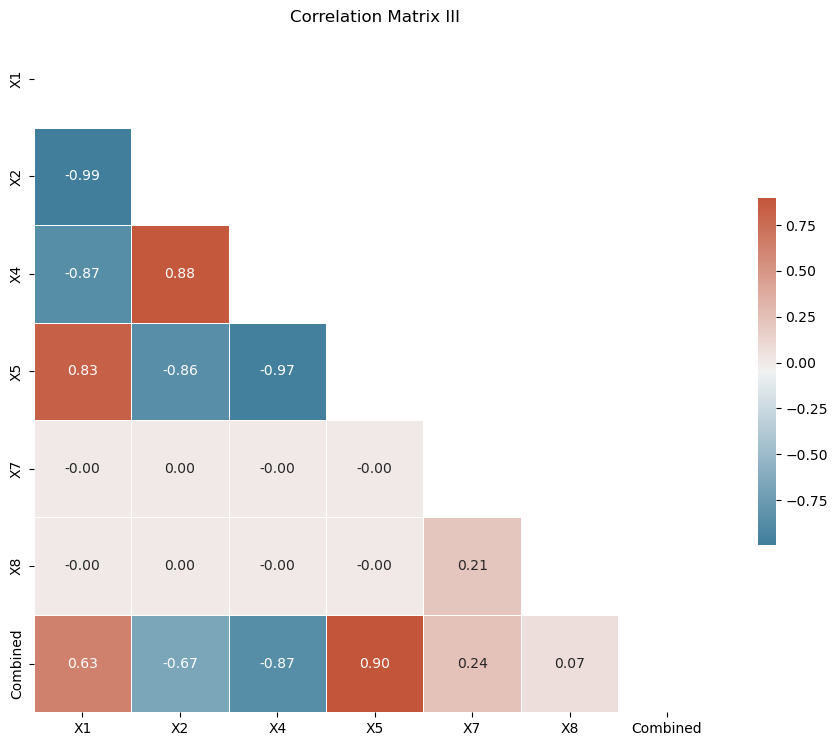

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

features_and_target = ['X1','X2','X4','X5', 'X7', 'X8', 'Combined']
data_for_corr = df[features_and_target]
corr = data_for_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, fmt=".2f",
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title('Correlation Matrix III')

plt.show()



## FINAL MODEL INCLUDING BOTH FEATURES X4 AND X5

In [96]:
# Mean Squared Error: 9.799097565762269


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

features_to_train = ['X1','X2','X4', 'X5', 'X7', 'X8']
X_train = train[features_to_train]
y_train = train['Combined']
X_val = val[features_to_train]
y_val = val['Combined']
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")
mse = mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error: {mse}")


Intercept: 94.09868067514698
Coefficients: [-7.16466081e+01 -4.00539087e-02 -9.39652032e-02  4.32053074e+00
  2.08752889e+01  1.33976443e-01]
Mean Squared Error: 9.799097565762269


## Part 4: Proposal

Given your exploration, come up with a proposal which includes a ranked list of design decisions that are likely to improve energy efficiency. Make sure your proposal is convincing (i.e., your arguments are backed by some concrete results). 

- X5 has a strong positive correlation with 'Combined', making it a great predictor for 'Combined', as well as for Y1 and Y2. This means that an increase in X5 would result in a steeper prediction line, showing a direct relationship with the target variable.

- On the other hand, X4 shows a strong negative correlation with 'Combined', indicating its usefulness as a predictor for 'Combined'. It seems to have the second strongest correlation with 'Combined' among the features analyzed, suggesting an inverse relationship where an increase in X4 leads to a decrease in the target variable.

- X7 and X8 have very weak correlations with 'Combined', suggesting they are less predictive for 'Combined'. However, they are still included in the model because they help to reduce the Mean Squared Error (MSE), thereby enhancing the model's accuracy.

- I observed that X3, X6, X7, and X8 have minimal to no correlation with one another, providing independent information without mutual influence. This led me to select X7 and X8 for inclusion in the model due to their impact on lowering the MSE, despite the potential redundancy or lack of strong correlation with 'Combined'.

- When the model was trained with features [ 'X3', 'X5', 'X7', 'X8' ] while excluding X4, the lowest MSE of 9.697 was achieved. However, the final selection of features [ 'X1', 'X2', 'X5', 'X4', 'X7', 'X8' ] led to a slightly higher MSE of 9.799. The inclusion of X4 is justified by its significant negative correlation with 'Combined', underscoring its importance in making accurate predictions.

- Feature Ranking Summary: X5 and X4 are the most significant predictors due to their strong correlations with 'Combined'. X2 comes next, followed by X1, which is grouped with X4 due to its importance. X7 and X8 are considered last, based on their weaker correlations but are included for their beneficial impact on model accuracy.
Feature Ranking: X5, X4, X2 with X5, X1 with X4, X7, X8

